In [3]:
# imports
import torch
import torchvision
import numpy as np
import random
import os
import cv2
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from torchvision import transforms
from sklearn.metrics import accuracy_score

from PIL import Image, ImageOps
import glob

import matplotlib.pyplot as plt

from numpy import asarray

In [4]:
# read in images using glob and cv2
cv2_images = []
moderate_images = []

all_images = []
labels = []

count = 0
for filename in glob.glob('./datasets/Non_Demented/*.jpg'): #assuming jpg files
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    #img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("non_demented")
    cv2_images.append((img, "non-demented"))
    
for filename in glob.glob('./datasets/Mild_Demented/*.jpg'): #assuming jpg files
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    #img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("mild_demented")
    cv2_images.append((img, "mild-demented"))

for filename in glob.glob('./datasets/Very_Mild_Demented/*.jpg'): #assuming jpg files
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    #img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("very_mild_demented")
    cv2_images.append((img, "very-mild-demented"))

# choose random 30 images to train on; leave the rest to be tested later (approx. half set)
#from random import randint 
#rand = [randint(0, 63) for i in range(30)]
#count = 0
for filename in glob.glob('./datasets/Moderate_Demented/*.jpg'): #assuming jpg files
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    #img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    cv2_images.append((img, "moderate-demented"))
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("moderate_demented")
    #count += 1
    # adding 30 random images to training
    #if (count in rand):
    #else:
    #    moderate_images.append(img.reshape(-1))

Text(0.5, 1.0, 'non-demented')

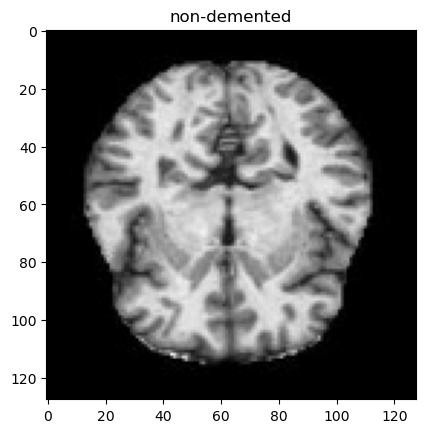

In [5]:
# show images (to be integrated with frontend)
plt.imshow(cv2.cvtColor(cv2_images[0][0], cv2.COLOR_BGR2RGB))
plt.title(cv2_images[0][1])

In [6]:
# train SVC
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)
clf = SVC(kernel='poly', C=1.0, gamma='auto')
clf.fit(X_train, y_train)

# draw predictions
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.99375


In [7]:
# save model as Pickle file
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

In [73]:
# find which predictions were incorrect
incorrect = []
count = 0
for i in range(len(y_test)):
    if(y_test[i] != y_pred[i]):
        count += 1
        incorrect.append((y_test[i], y_pred[i]))

print("Incorrectly Categorized", count)
print("Total Images", len(y_test))
incorrect

Incorrectly Categorized 8
Total Images 1280


[('mild_demented', 'non_demented'),
 ('mild_demented', 'non_demented'),
 ('mild_demented', 'non_demented'),
 ('non_demented', 'very_mild_demented'),
 ('mild_demented', 'non_demented'),
 ('non_demented', 'very_mild_demented'),
 ('mild_demented', 'very_mild_demented'),
 ('non_demented', 'very_mild_demented')]

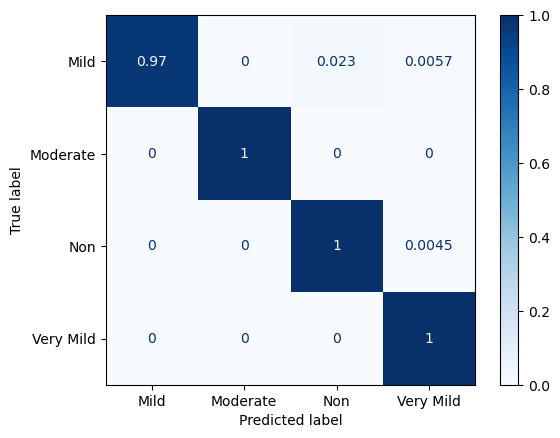

In [74]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='Blues', normalize='true', display_labels = ["Mild", "Moderate", "Non", "Very Mild"])

In [64]:
# ISSUE: fewer moderate images, not in testing set
# trained on NO moderate images, testing on only moderate images

moderate_pred = clf.predict(moderate_images)
moderate_labels = np.full((len(moderate_pred), 1), "moderate_demented")
moderate_accuracy = accuracy_score(moderate_labels, moderate_pred)
print(f'Accuracy: {accuracy}')

incorrect_mod = []
count = 0
for i in range(len(moderate_labels)):
    if(moderate_labels[i] != moderate_pred[i]):
        count += 1
        incorrect_mod.append((moderate_labels[i], moderate_pred[i]))

print("Incorrectly Categorized", count)
print("Total Images", len(moderate_images))
incorrect_mod

Accuracy: 0.9889937106918238
Incorrectly Categorized 11
Total Images 42


[(array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'very_mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'mild_demented'),
 (array(['moderate_demented'], dtype='<U17'), 'mild_demented')]

In [23]:
#Neural Net trials
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Neural Net Accuracy: {accuracy}')

Neural Net Accuracy: 0.52109375
